In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [124]:
coal_gen = pd.read_csv("../committed_facilities/AR6_coal_el_R10.csv")
coal_gen = coal_gen.rename(columns={"EJ/yr":"Coal_EJ/yr"})
gas_gen = pd.read_csv("../committed_facilities/AR6_gas_el_R10.csv")
gas_gen = gas_gen.rename(columns={"EJ/yr":"Gas_EJ/yr"})
solar_gen = pd.read_csv("../committed_facilities/AR6_solar_el_R10.csv")
solar_gen = solar_gen.rename(columns={"EJ/yr":"Solar_EJ/yr"})
wind_gen = pd.read_csv("../committed_facilities/AR6_wind_el_R10.csv")
wind_gen = wind_gen.rename(columns={"EJ/yr":"Wind_EJ/yr"})
electricity_gen = pd.read_csv("../committed_facilities/AR6_SecEnergy_el_R10.csv")
electricity_gen = electricity_gen.rename(columns={"EJ/yr":"Electricity_EJ/yr"})
coal_gen

,Model,Scenario,Category,Region,Year,Coal_EJ/yr
0,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_600f_COV,C1,R10LATIN_AM,2025,2.930000e-02
1,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_200f,C1,R10CHINA+,2024,9.664660e+00
2,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_200f,C1,R10EUROPE,2024,8.255000e-01
3,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_200f,C1,R10INDIA+,2024,3.893260e+00
4,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_200f,C1,R10LATIN_AM,2024,1.830000e-01
...,...,...,...,...,...,...
387724,REMIND 2.1,LeastTotalCost_CEA_brkSR15_SSP2_P50,C3,R10REST_ASIA,2034,1.105500e+00
387725,REMIND 2.1,LeastTotalCost_CEA_brkSR15_SSP2_P50,C3,R10REF_ECON,2034,5.006400e-01
387726,REMIND 2.1,LeastTotalCost_CEA_brkSR15_SSP2_P50,C3,R10PAC_OECD,2034,3.325200e-01
387727,REMIND 2.1,LeastTotalCost_LTC_brkLR15_SSP2_P50,C3,R10EUROPE,2034,1.028000e-02


In [125]:
combine_gen = pd.merge(coal_gen,gas_gen,on=["Model","Scenario","Category","Region","Year"])
combine_gen = pd.merge(combine_gen,solar_gen,on=["Model","Scenario","Category","Region","Year"])
combine_gen = pd.merge(combine_gen,wind_gen,on=["Model","Scenario","Category","Region","Year"])
combine_gen = pd.merge(combine_gen,electricity_gen,on=["Model","Scenario","Category","Region","Year"])
combine_gen['unit'] = combine_gen[['Model', 'Scenario']].agg('*'.join, axis=1)
combine_gen

,Model,Scenario,Category,Region,Year,Coal_EJ/yr,Gas_EJ/yr,Solar_EJ/yr,Wind_EJ/yr,Electricity_EJ/yr,unit
0,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_600f_COV,C1,R10LATIN_AM,2025,2.930000e-02,5.358000e-01,0.722000,0.846800,6.808100,REMIND-MAgPIE 2.1-4.2*EN_NPi2020_600f_COV
1,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_200f,C1,R10CHINA+,2024,9.664660e+00,3.440400e+00,4.173440,3.009120,29.180760,REMIND-MAgPIE 2.1-4.2*EN_NPi2020_200f
2,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_200f,C1,R10EUROPE,2024,8.255000e-01,2.766860e+00,2.047220,2.814800,12.776480,REMIND-MAgPIE 2.1-4.2*EN_NPi2020_200f
3,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_200f,C1,R10INDIA+,2024,3.893260e+00,3.889600e-01,1.383700,0.836780,7.979680,REMIND-MAgPIE 2.1-4.2*EN_NPi2020_200f
4,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_200f,C1,R10LATIN_AM,2024,1.830000e-01,1.050900e+00,0.763720,0.891660,7.563880,REMIND-MAgPIE 2.1-4.2*EN_NPi2020_200f
...,...,...,...,...,...,...,...,...,...,...,...
386814,REMIND 2.1,LeastTotalCost_CEA_brkSR15_SSP2_P50,C3,R10REST_ASIA,2034,1.105500e+00,4.234020e+00,2.486360,1.910200,13.233060,REMIND 2.1*LeastTotalCost_CEA_brkSR15_SSP2_P50
386815,REMIND 2.1,LeastTotalCost_CEA_brkSR15_SSP2_P50,C3,R10REF_ECON,2034,5.006400e-01,2.911640e+00,0.509720,0.386220,6.640020,REMIND 2.1*LeastTotalCost_CEA_brkSR15_SSP2_P50
386816,REMIND 2.1,LeastTotalCost_CEA_brkSR15_SSP2_P50,C3,R10PAC_OECD,2034,3.325200e-01,6.276800e-01,0.386100,0.313060,3.364200,REMIND 2.1*LeastTotalCost_CEA_brkSR15_SSP2_P50
386817,REMIND 2.1,LeastTotalCost_LTC_brkLR15_SSP2_P50,C3,R10EUROPE,2034,1.028000e-02,1.061500e+00,4.074020,6.201640,14.916980,REMIND 2.1*LeastTotalCost_LTC_brkLR15_SSP2_P50


In [128]:
scen_names = combine_gen["unit"].unique()
select_regions = ['R10CHINA+','R10INDIA+','R10EUROPE','R10NORTH_AM']
for reg in select_regions:
    for scen in scen_names:
        combine_gen_scen = combine_gen.query("unit==@scen").query("Region==@reg")
        combine_gen_scen = combine_gen_scen.sort_values(by="Year")
        max_coal = combine_gen_scen["Coal_EJ/yr"].max()
        max_coal_row = combine_gen_scen[combine_gen_scen["Coal_EJ/yr"]==max_coal]
        if len(max_coal_row) != 0:
            max_coal_year = max_coal_row["Year"].iloc[0]
            max_year_gas = max_coal_row["Gas_EJ/yr"].iloc[0]
            combine_gen_scen["max_coal"] = max_coal
            combine_gen_scen["max_coal_year"] = max_coal_year
            combine_gen_scen["Gen_Coal_vPeak"] = combine_gen_scen["Coal_EJ/yr"]/max_coal
            combine_gen_scen["Gen_Gas_new"] = combine_gen_scen["Gas_EJ/yr"]-max_coal_row["Gas_EJ/yr"].iloc[0]
            combine_gen_scen["Gen_Gas_vPeakCoal"] = combine_gen_scen["Gen_Gas_new"]/max_coal
            combine_gen_scen["Gen_Solar_new"] = combine_gen_scen["Solar_EJ/yr"]-max_coal_row["Solar_EJ/yr"].iloc[0]
            combine_gen_scen["Gen_Solar_vPeakCoal"] = combine_gen_scen["Gen_Solar_new"]/max_coal
            combine_gen_scen["Gen_Wind_new"] = combine_gen_scen["Wind_EJ/yr"]-max_coal_row["Wind_EJ/yr"].iloc[0]
            combine_gen_scen["Gen_Wind_vPeakCoal"] = combine_gen_scen["Gen_Wind_new"]/max_coal
            if scen == scen_names[0] and reg == select_regions[0]:
                combine_gen_all = combine_gen_scen
            else:
                combine_gen_all = pd.concat([combine_gen_all,combine_gen_scen])
combine_gen_all["year_since_peak_gen"] = combine_gen_all["Year"]-combine_gen_all["max_coal_year"]
combine_gen_all["Share_Solar_Gen"] = combine_gen_all["Solar_EJ/yr"]/combine_gen_all["Electricity_EJ/yr"]
combine_gen_all["Share_Wind_Gen"] = combine_gen_all["Wind_EJ/yr"]/combine_gen_all["Electricity_EJ/yr"]
combine_gen_all["Share_Gas_Gen"] = combine_gen_all["Gas_EJ/yr"]/combine_gen_all["Electricity_EJ/yr"]
combine_gen_all["Share_Coal_Gen"] = combine_gen_all["Coal_EJ/yr"]/combine_gen_all["Electricity_EJ/yr"]
combine_gen_all.set_index("Model").to_csv("AR6_coal_generation.csv")
combine_gen_all

,Model,Scenario,Category,Region,Year,Coal_EJ/yr,Gas_EJ/yr,Solar_EJ/yr,Wind_EJ/yr,Electricity_EJ/yr,...,Gen_Gas_vPeakCoal,Gen_Solar_new,Gen_Solar_vPeakCoal,Gen_Wind_new,Gen_Wind_vPeakCoal,year_since_peak_gen,Share_Solar_Gen,Share_Wind_Gen,Share_Gas_Gen,Share_Coal_Gen
46107,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_600f_COV,C1,R10CHINA+,2005,7.47390,0.21190,0.00040,0.00740,9.6790,...,-0.040409,-0.14540,-0.010234,-0.66240,-0.046625,-10,0.000041,0.000765,0.021893,0.772177
48939,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_600f_COV,C1,R10CHINA+,2006,8.21882,0.25112,0.00624,0.10592,10.8015,...,-0.037649,-0.13956,-0.009823,-0.56388,-0.039690,-9,0.000578,0.009806,0.023249,0.760896
44822,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_600f_COV,C1,R10CHINA+,2007,8.96374,0.29034,0.01208,0.20444,11.9240,...,-0.034888,-0.13372,-0.009412,-0.46536,-0.032755,-8,0.001013,0.017145,0.024349,0.751739
49963,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_600f_COV,C1,R10CHINA+,2008,9.70866,0.32956,0.01792,0.30296,13.0465,...,-0.032128,-0.12788,-0.009001,-0.36684,-0.025821,-7,0.001374,0.023222,0.025260,0.744158
46822,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_600f_COV,C1,R10CHINA+,2009,10.45358,0.36878,0.02376,0.40148,14.1690,...,-0.029367,-0.12204,-0.008590,-0.26832,-0.018886,-6,0.001677,0.028335,0.026027,0.737778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205255,AIM/CGE 2.2,EN_NPi2020_800,C3,R10NORTH_AM,2096,0.00000,0.00000,13.52324,15.74336,54.2126,...,-0.523765,13.43094,1.814085,15.37566,2.076754,86,0.249448,0.290400,0.000000,0.000000
212505,AIM/CGE 2.2,EN_NPi2020_800,C3,R10NORTH_AM,2097,0.00000,0.00000,13.61468,15.84502,54.4273,...,-0.523765,13.52238,1.826435,15.47732,2.090484,87,0.250144,0.291123,0.000000,0.000000
210090,AIM/CGE 2.2,EN_NPi2020_800,C3,R10NORTH_AM,2098,0.00000,0.00000,13.70612,15.94668,54.6420,...,-0.523765,13.61382,1.838786,15.57898,2.104215,88,0.250835,0.291839,0.000000,0.000000
197964,AIM/CGE 2.2,EN_NPi2020_800,C3,R10NORTH_AM,2099,0.00000,0.00000,13.79756,16.04834,54.8567,...,-0.523765,13.70526,1.851137,15.68064,2.117946,89,0.251520,0.292550,0.000000,0.000000


In [54]:
C1_c = "#649B1C"
C2_c = "#00B593"
C3_c = "#4E84D4"
C_colors = [C1_c, C2_c, C3_c]
C_list = ["C1", "C2", "C3"]

Text(0.5, 0, '')

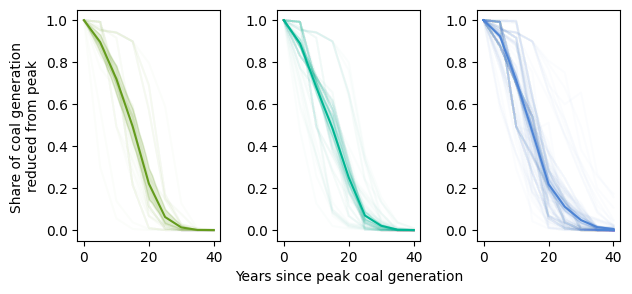

In [90]:
fig, axes = plt.subplots(1,3,figsize=(7,3))
fig.subplots_adjust(wspace=0.4)
reg = "R10EUROPE"
for i in [0,1,2]:
    plot_color = C_colors[i]
    plot_cat = C_list[i]
    plot_data = combine_gen_all.query("Category==@plot_cat").query("Region==@reg")
    plot_data = plot_data[plot_data["year_since_peak_gen"]>=0]
    plot_data = plot_data.query("Category==@plot_cat")
    plot_data = plot_data[plot_data["year_since_peak_gen"]<=40]
    sns.lineplot(x="year_since_peak_gen",y='Gen_Coal_vPeak',data=plot_data,
                 color=plot_color,units="unit",estimator=None,alpha=0.02,zorder=1,legend=None,ax=axes[i])
    sns.lineplot(x="year_since_peak_gen", y="Gen_Coal_vPeak",data=plot_data,color=plot_color,ax=axes[i])
axes[1].set_ylabel(None)
axes[2].set_ylabel(None)
axes[0].set_ylabel("Share of coal generation \nreduced from peak")
axes[1].set_xlabel("Years since peak coal generation")
axes[0].set_xlabel(None)
axes[2].set_xlabel(None)

Text(0.5, 0, '')

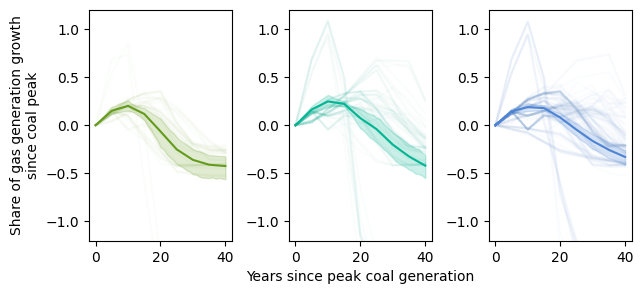

In [98]:
fig, axes = plt.subplots(1,3,figsize=(7,3))
fig.subplots_adjust(wspace=0.4)
reg = "R10NORTH_AM"
for i in [0,1,2]:
    plot_color = C_colors[i]
    plot_cat = C_list[i]
    plot_data = combine_gen_all.query("Category==@plot_cat").query("Region==@reg")
    plot_data = plot_data[plot_data["year_since_peak_gen"]>=0]
    plot_data = plot_data.query("Category==@plot_cat")
    plot_data = plot_data[plot_data["year_since_peak_gen"]<=40]
    sns.lineplot(x="year_since_peak_gen",y='Gen_Gas_vPeakCoal',data=plot_data,
                 color=plot_color,units="unit",estimator=None,alpha=0.02,zorder=1,legend=None,ax=axes[i])
    sns.lineplot(x="year_since_peak_gen", y="Gen_Gas_vPeakCoal",data=plot_data,color=plot_color,ax=axes[i])
    axes[i].set_ylim([-1.2,1.2])
axes[1].set_ylabel(None)
axes[2].set_ylabel(None)
axes[0].set_ylabel("Share of gas generation growth\nsince coal peak")
axes[1].set_xlabel("Years since peak coal generation")
axes[0].set_xlabel(None)
axes[2].set_xlabel(None)

In [101]:
plot_data["max_coal_year"].unique()

array([2010, 2020, 2005, 2015], dtype=int64)

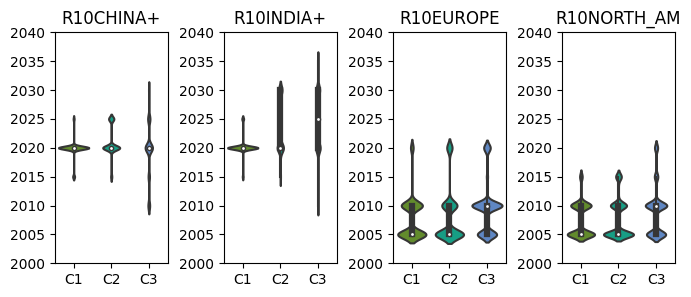

In [112]:
select_regions = ['R10CHINA+','R10INDIA+','R10EUROPE','R10NORTH_AM']
fig, axes = plt.subplots(1,4,figsize=(8,3))
fig.subplots_adjust(wspace=0.5)
count = 0
for reg in select_regions:
    sns.violinplot(data=combine_gen_all.query("Region==@reg"),
                   x="Category", y="max_coal_year",palette=[C1_c,C2_c,C3_c], 
                   linewidth=1.5,ax=axes[count])
    axes[count].set_ylim([2000,2040])
    axes[count].set_ylabel(None)
    axes[count].set_xlabel(None)
    axes[count].set_title(reg)
    count = count+1